# Project: Applied Statistics
(**Medical-insurance-Data-Analysis**)

**Data Description:**
The data at hand contains medical costs of people characterized by certain attributes.

**Domain:**
Healthcare

***Context:***
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

***Column Information:***
age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance.

 

**Author:** Akshyangsu Sekhar Barik

***DATE:*** 2020-08-30

# 1. importing  necessary libraries

In [1]:
import pandas as pd, numpy as np, scipy.stats as stats, matplotlib.pyplot as plt, seaborn as sns
import matplotlib.style as style; 
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
import statsmodels.api as sm
pd.options.display.max_rows = 4000
from scipy.stats import chi2

# 2. Read the data as a data frame

In [2]:
ins = pd.read_csv('/Volumes/DataHD/GIT_REPO/Python_repo/AI-ML-Enginering/AI-ML-REPO/gl_projects/EDA/insurance.csv')

In [3]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3.a: EDA - shape & type of Data

In [4]:
print(ins.shape)
 

(1338, 7)


# 3.b: Data type of each attribute

In [5]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 3.c: EDA - Checking the presence of missing values

In [6]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 3.d: EDA - 5 point summary of numerical attributes

In [7]:
ins.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## 3.e:  Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

Distribution of 'Age' alongwith measure of CT



39.20702541106129
39.0
0    18
dtype: int64


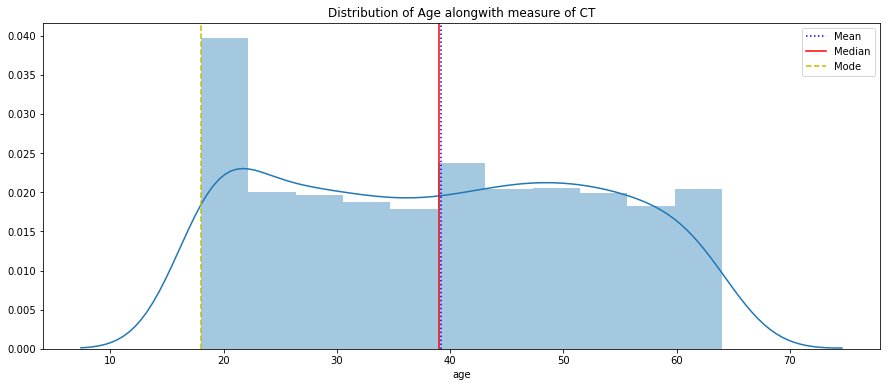

In [8]:
mean_age=ins['age'].mean()
med_age=ins['age'].median()
mod_age=ins['age'].mode()
print(mean_age)
print(med_age)
print(mod_age)
fig,_=plt.subplots(figsize=(15.0,6))
_ = sns.distplot(ins['age'])
_.axvline(mean_age,color='b',ls=':',label='Mean')
_.axvline(med_age,color='r',ls='-',label='Median')
_.axvline(mod_age[0],color='y',ls='--',label='Mode')
_.set_title('Distribution of Age alongwith measure of CT') 

plt.legend()
plt.show()

30.663396860986538
30.4
0    32.3
dtype: float64


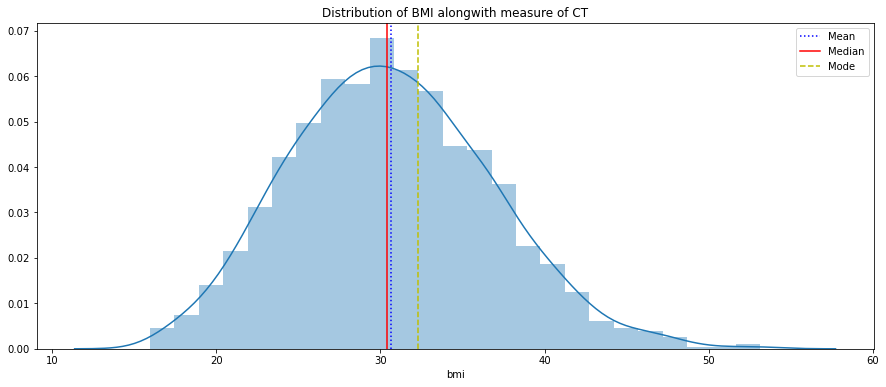

In [9]:
#Distribution of 'bmi' alongwith measure of CT
mean_bmi=ins['bmi'].mean()
med_bmi=ins['bmi'].median()
mod_bmi=ins['bmi'].mode()
print(mean_bmi)
print(med_bmi)
print(mod_bmi)
fig,_=plt.subplots(figsize=(15.0,6))
_ = sns.distplot(ins['bmi'])
_.axvline(mean_bmi,color='b',ls=':',label='Mean')
_.axvline(med_bmi,color='r',ls='-',label='Median')
_.axvline(mod_bmi[0],color='y',ls='--',label='Mode')
_.set_title('Distribution of BMI alongwith measure of CT') 

 

plt.legend()
plt.show()


13270.422265141257
9382.033
0    1639.5631
dtype: float64


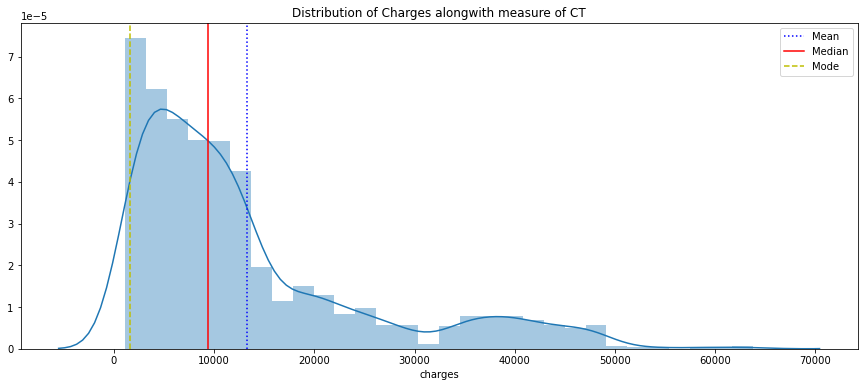

In [10]:
#Distribution of 'charges' alongwith measure of CT
mean_chrg=ins['charges'].mean()
med_chrg=ins['charges'].median()
mod_chrg=ins['charges'].mode()
print(mean_chrg)
print(med_chrg)
print(mod_chrg)
fig,_=plt.subplots(figsize=(15.0,6))
_ = sns.distplot(ins['charges'])
_.axvline(mean_chrg,color='b',ls=':',label='Mean')
_.axvline(med_chrg,color='r',ls='-',label='Median')
_.axvline(mod_chrg[0],color='y',ls='--',label='Mode')
_.set_title('Distribution of Charges alongwith measure of CT') 



plt.legend()
plt.show()

## 3.f Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

Skewness is a measure of extent to which a distribution differs from a normal distribution.

The rule:
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.

If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed


In [11]:
#Determining skewness of `age`, `bmi` and `charges`
sw_age=ins['age'].skew().round(3)
sw_bmi=ins['bmi'].skew().round(3)
sw_charges=ins['charges'].skew().round(3)
print(f'Skewness age is {sw_age} ')
print(f'Skewness bmi is {sw_bmi} ')
print(f'Skewness charges is {sw_charges} ')

Skewness age is 0.056 
Skewness bmi is 0.284 
Skewness charges is 1.516 


setting up norm. distribution and ploting result for Age

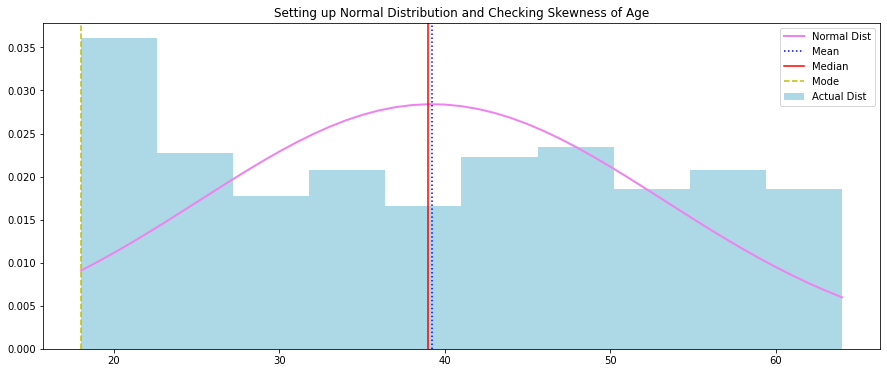

In [12]:
age = np.asarray(ins['age'])
age=sorted(age)
age_noam= stats.norm.pdf(age,np.mean(age),np.std(age))
#Plot the histogram 
fig, _=plt.subplots(figsize=(15,6))
plt.plot(age,age_noam,'-',linewidth=2,color='violet',label='Normal Dist')
plt.hist(age,density = True,color='lightblue',label='Actual Dist')
_.axvline(mean_age,color='b',ls=':',label='Mean')
_.axvline(med_age,color='r',ls='-',label='Median')
_.axvline(mod_age[0],color='y',ls='--',label='Mode')

_.set_title('Setting up Normal Distribution and Checking Skewness of Age')

plt.legend()
plt.show()

We can see its failrly symmetrical distribution, Where Skewness is around 0.56

Setting Up Normal distribution and compairing bmi skewness

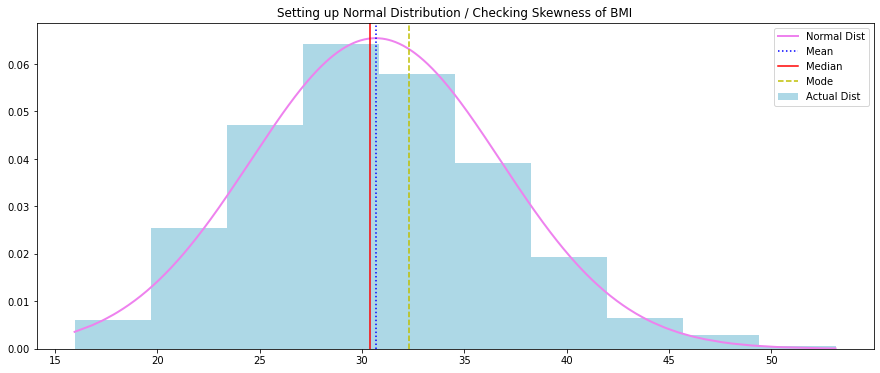

In [13]:
bmi=np.asarray(ins['bmi'])
bmi=sorted(bmi)
bms_norm=stats.norm.pdf(bmi,np.mean(bmi),np.std(bmi))
fig, _=plt.subplots(figsize=(15,6))

plt.plot(bmi,bms_norm,'-',linewidth=2,color='violet',label='Normal Dist')
plt.hist(bmi,density = True,color='lightblue',label='Actual Dist')
_.axvline(mean_bmi,color='b',ls=':',label='Mean')
_.axvline(med_bmi,color='r',ls='-',label='Median')
_.axvline(mod_bmi[0],color='y',ls='--',label='Mode')

_.set_title('Setting up Normal Distribution / Checking Skewness of BMI')

plt.legend()
plt.show()


We can see its failrly symmetrical distribution, Where Skewness is around 0.284 

Setting Up Normal distribution and compairing bmi skewness

Text(0.5, 1.0, 'Setting up Normal Distribution / Checking Skewness of charges')

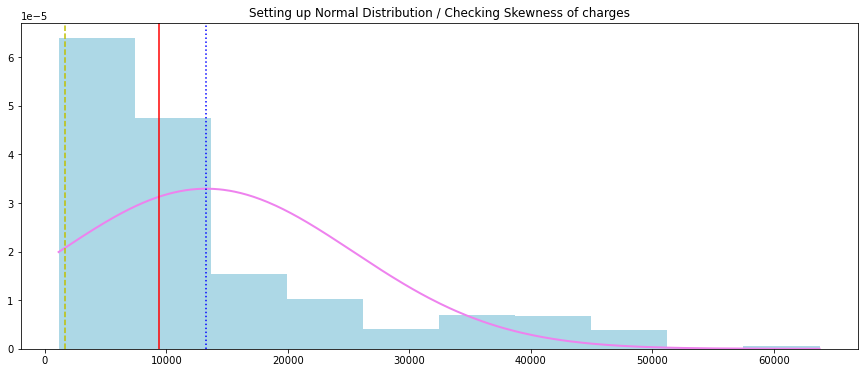

In [14]:
chrg=np.asarray(ins['charges'])
chrg=sorted(chrg)
chrg_norm=stats.norm.pdf(chrg,np.mean(chrg),np.std(chrg))
fig, _=plt.subplots(figsize=(15,6))

plt.plot(chrg,chrg_norm,'-',linewidth=2,color='violet',label='Normal Dist')
plt.hist(chrg,density = True,color='lightblue',label='Actual Dist')
_.axvline(mean_chrg,color='b',ls=':',label='Mean')
_.axvline(med_chrg,color='r',ls='-',label='Median')
_.axvline(mod_chrg[0],color='y',ls='--',label='Mode')

_.set_title('Setting up Normal Distribution / Checking Skewness of charges')

#plt.legend()
#plt.show()

We can see its  Skewness is around 1.516 and its Highly skewed

## 3.g: Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges
***In statistics, an outlier is an observation point that is distant from other observations.***

,age,sex,bmi,children,smoker,region,charges


Text(0.5, 1.0, 'Outlier in Age')

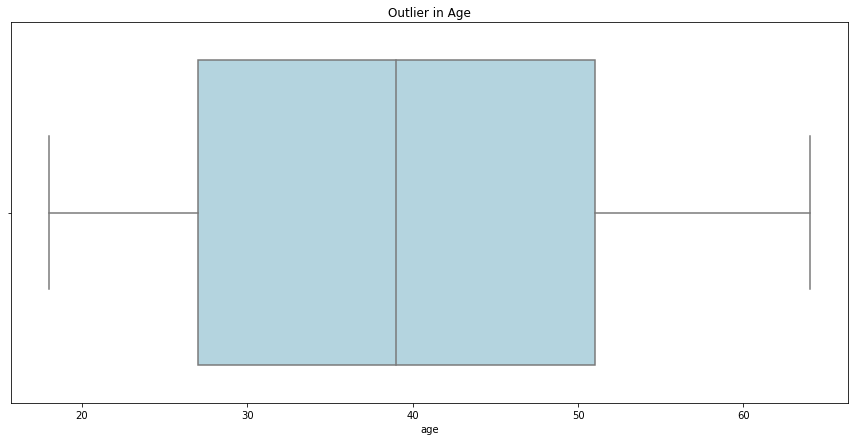

In [15]:
#Outliers in Age
Q3 = ins['age'].quantile(0.75)
Q1 = ins['age'].quantile(0.25)
IQR = Q3 - Q1
display(ins.loc[(ins['age'] < (Q1 - 1.5 * IQR)) | (ins['age'] > (Q3 + 1.5 * IQR))])

plt.figure(figsize = (15 , 7))
sns.boxplot(ins['age'],color='lightblue'  ).set_title('Outlier in Age')


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


Text(0.5, 1.0, 'Outlier in bmi')

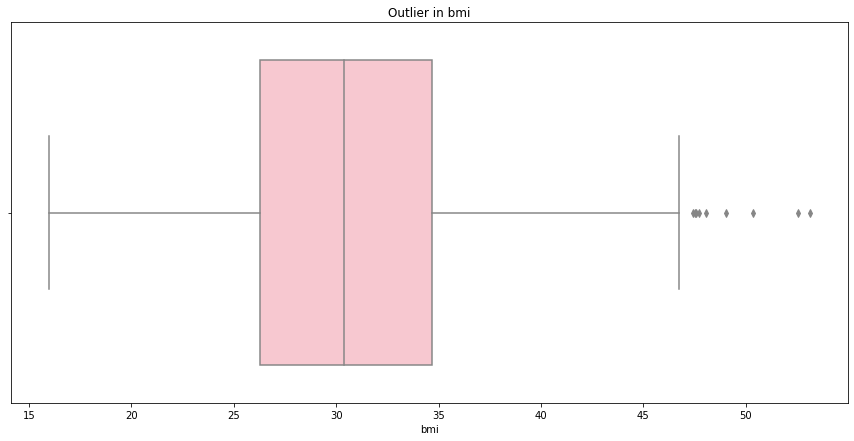

In [16]:
#Outliers in bmi
Q3 = ins['bmi'].quantile(0.75)
Q1 = ins['bmi'].quantile(0.25)
IQR = Q3 - Q1
display(ins.loc[(ins['bmi'] < (Q1 - 1.5 * IQR)) | (ins['bmi'] > (Q3 + 1.5 * IQR))])

plt.figure(figsize = (15 , 7))
sns.boxplot(ins['bmi'],color='pink'  ).set_title('Outlier in bmi')

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630
39,60,male,39.900,0,yes,southwest,48173.36100
49,36,male,35.200,1,yes,southeast,38709.17600
53,36,male,34.430,0,yes,southeast,37742.57570


Text(0.5, 1.0, 'Outlier in charges')

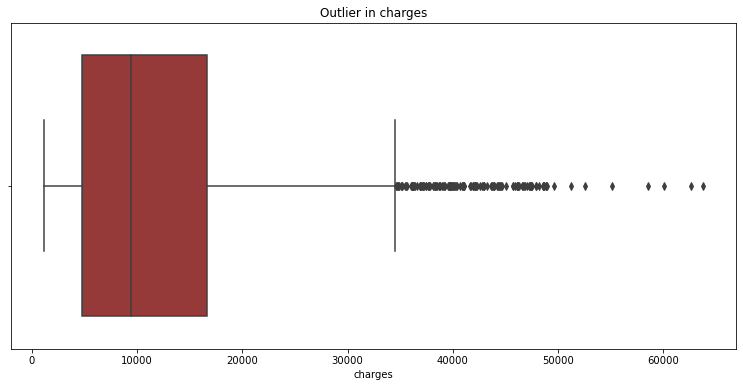

In [17]:
#Outliers in charges
Q3 = ins['charges'].quantile(0.75)
Q1 = ins['charges'].quantile(0.25)
IQR = Q3 - Q1
display(ins.loc[(ins['charges'] < (Q1 - 1.5 * IQR)) | (ins['charges'] > (Q3 + 1.5 * IQR))])

plt.figure(figsize = (13 , 6))
sns.boxplot(ins['charges'],color='brown'  ).set_title('Outlier in charges')

## 3.h Distribution of categorical columns (include children) 

In [18]:
# Converting children to categorical
ins['children'] = pd.Categorical(ins['children'])

# Replacing non-smoker with 0 and smoker with 1
ins['smoker'] = ins['smoker'].replace({'no': 0, 'yes': 1})

# Replacing male with 1 and female with 0
ins['sex'] = ins['sex'].replace({'female': 0, 'male': 1})

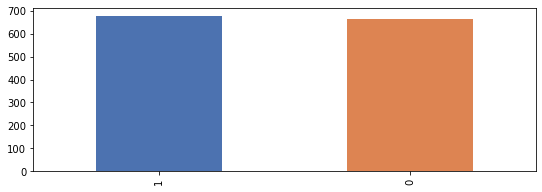

In [19]:
# Dist. of sex - Male - 1, Female - 0
plt.figure(figsize = (9 , 3))

ins['sex'].value_counts().plot.bar(color = sns.color_palette('deep', 2))

Text(0.5, 1.0, 'Count of Smokers by Sex')

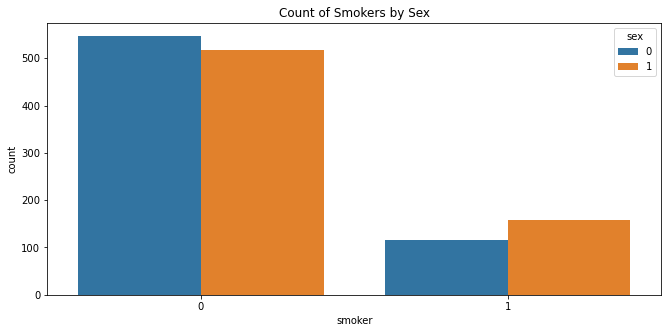

In [20]:
#Somker count w.r.t to gender
fig=plt.figure(figsize=(11,5))
sns.countplot(x = 'smoker', hue = 'sex',   data = ins).set_title('Count of Smokers by Sex')

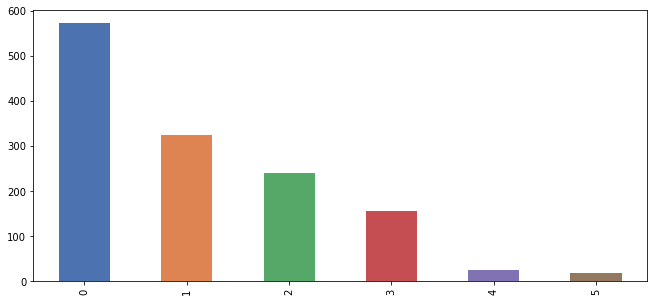

In [21]:
# Distribution of children
plt.figure(figsize = (11,5))

ins['children'].value_counts().plot.bar(color = sns.color_palette('deep', 6))

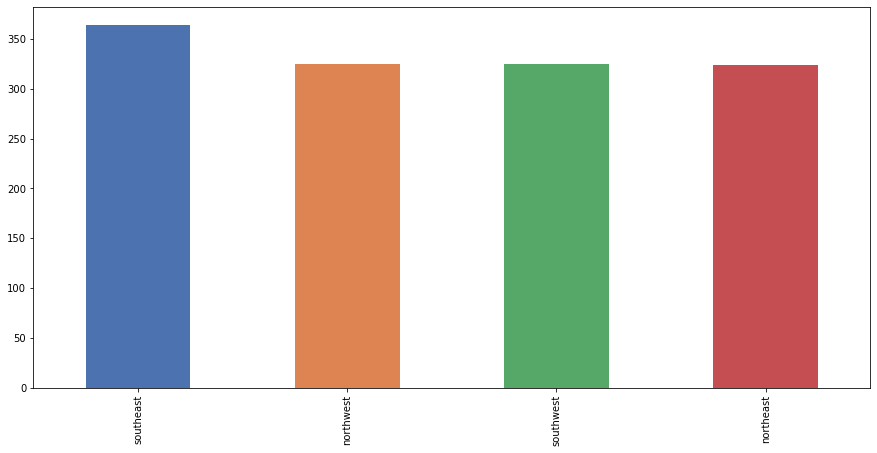

In [22]:
# Dist. of region
plt.figure(figsize = (15 , 7))

ins['region'].value_counts().plot.bar(color = sns.color_palette('deep', 4))

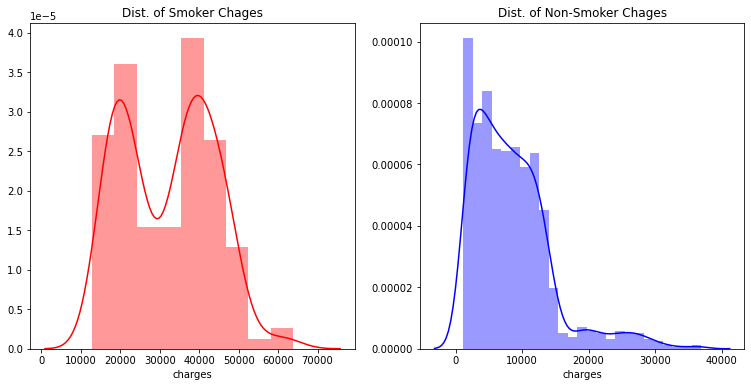

In [23]:
# Charges distribution for smoker and nonsmoker
fig=plt.figure(figsize=(12.8,6))
ax= fig.add_subplot(121)
sns.distplot(ins[ins['smoker']==1]['charges'],color='r',ax=ax ).set_title('Dist. of Smoker Chages')
ax= fig.add_subplot(122)
sns.distplot(ins[(ins['smoker'] == 0)]['charges'], color = 'b' 
           ,ax=ax  ).set_title('Dist. of Non-Smoker Chages') 
plt.legend;plt.show()

## 3.i Pair plot that includes all the columns of the data frame

In [24]:
# Replace 0 with no and 1 with yes
ins['smoker'] = ins['smoker'].replace({0: 'no', 1: 'yes'})
ins['smoker'].head(2)

0    yes
1     no
Name: smoker, dtype: object

In [25]:
# Replace 1 with male and 0 with female
ins['sex'] = ins['sex'].replace({0: 'female', 1: 'male'})
ins['sex'].head(2)

0    female
1      male
Name: sex, dtype: object

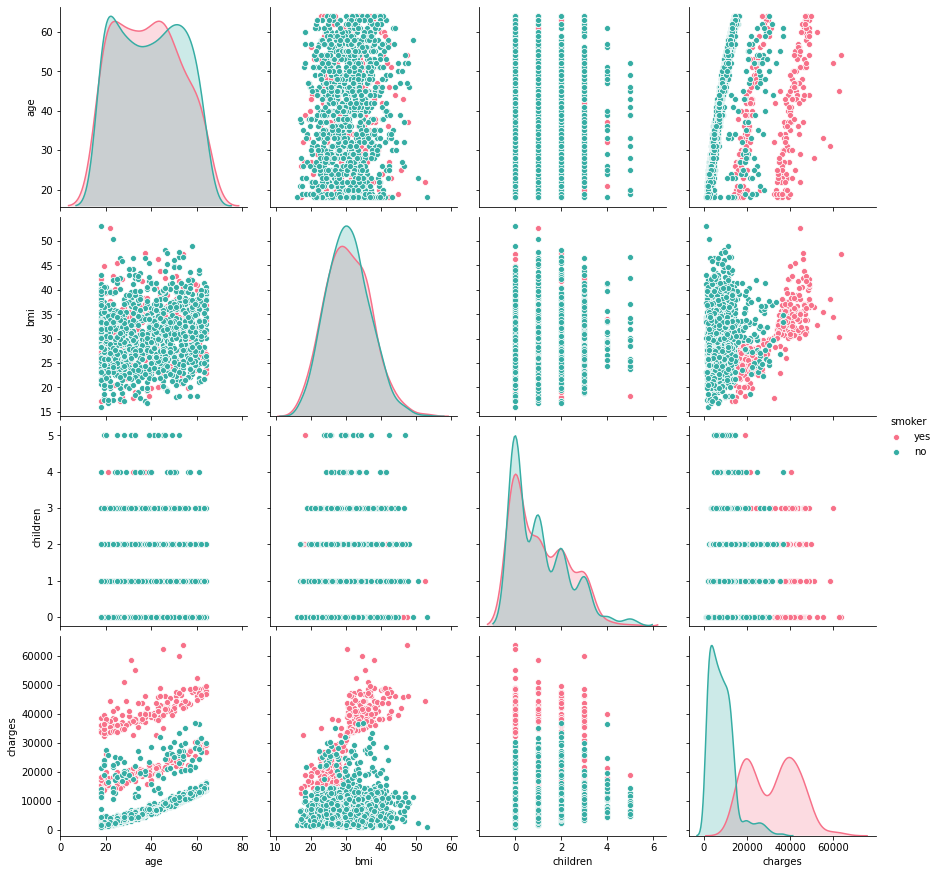

In [26]:
sns.pairplot(ins, height=3,hue="smoker", palette="husl")
 

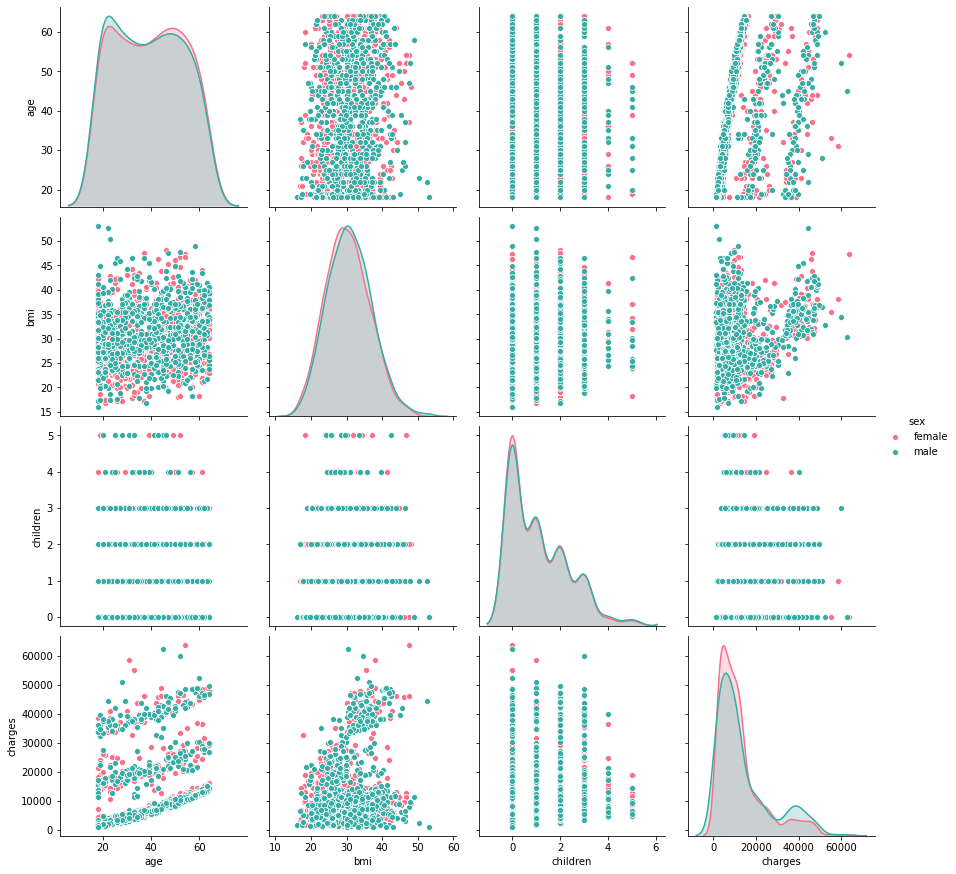

In [27]:
sns.pairplot(ins, height=3,hue="sex", palette="husl")



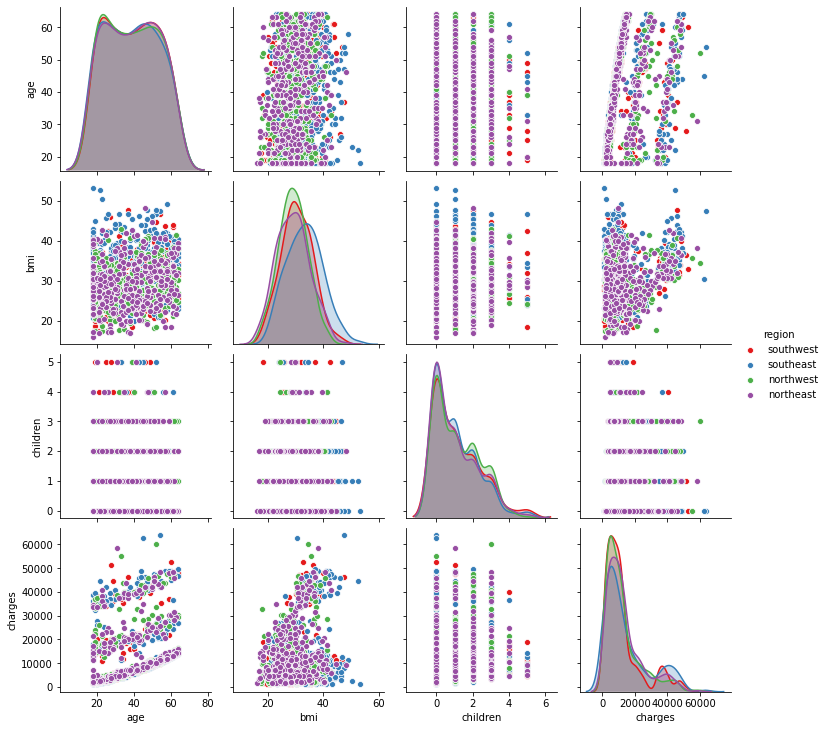

In [28]:
sns.pairplot(ins, hue = 'region', palette = 'Set1')

# 4.statisticalevidence
T-test: This type of test is a type of inferential statistic and is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

***H0 = Charges for smokers and non-smokers don't differ significantly***

***H1 = Charges for smokers and non-smokers differs significantly***

In [29]:
## 4.a: Do charges of people who smoke differ significantly from the people who don't?  

In [30]:
smokers= np.array(ins[ins['smoker']=='yes']['charges']) 
non_smokers=np.array(ins[ins['smoker']=='no']['charges']) 
smoker_mean= np.array(ins[ins['smoker']=='yes']['charges']).mean().round(2)
non_smoker_mean=np.array(ins[ins['smoker']=='no']['charges']).mean().round(2)
print(f'mean of smoker is {smoker_mean}')
print(f'mean of non smoker is {non_smoker_mean}')
t, p_value = stats.ttest_ind(smokers, non_smokers, axis = 0)
print(p_value.round(4))
#performing an independent T-test
if p_value <0.05:
    
     print('Charges differs significantly.')

else:
    
     print("Charges don't differ significantly.")


mean of smoker is 32050.23
mean of non smoker is 8434.27
0.0
Charges differs significantly.


## 4.b:Does bmi of males differ significantly from that of females

In [31]:
male_bmi = np.array(ins[ins['sex'] == 'male']['bmi'])
female_bmi = np.array(ins[ins['sex'] == 'female']['bmi'])

print('Mean of Charges for Smokers: {}'.format(male_bmi.mean().round(2)))
print('Mean of Charges for Non-smokers: {}\n'.format(female_bmi.mean().round(2)))

#performing an independent T-test
t, p_value = stats.ttest_ind(male_bmi, female_bmi, axis = 0)
print(round(p_value,4))
if p_value <0.05:
    
     print('BMI of male and female differs significantly.')

else:
    
     print("BMI of male and female don't differ significantly.")

Mean of Charges for Smokers: 30.94
Mean of Charges for Non-smokers: 30.38

0.09
BMI of male and female don't differ significantly.


## 4.c: Is the proportion of smokers significantly different in different  genders
**H0: Prop. of smokers in male and female are equal**

**H1: Prop. of smokers in male and female are not equal**

In [32]:
smokersF = ins[ins['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
smokerM = ins[ins['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
cnt_females = ins['sex'].value_counts()['female'] # number of females in the data
cnt_males = ins['sex'].value_counts()['male'] #number of males in the data
stat, p_value = proportions_ztest([smokersF, smokerM] , [cnt_females, cnt_males])
print(p_value.round(4))
if p_value < 0.05:
     print('Proportion of smokers in male and female are not equal.')

else:
     print('Proportion of smokers in male and female are equal.')

0.0053
Proportion of smokers in male and female are not equal.


# 4.d: Is the distribution of bmi across women with no children, one child and two children, the same

* H0: All pairs of samples are same i.e. all sample means are equal
* H1: At least one pair of samples is significantly different

In [33]:
anova = ins[['bmi', 'sex', 'children']].copy()
anova = anova[anova['sex'] == 'female']
anova.drop('sex', axis = 1, inplace = True)

anova = anova.loc[(anova['children'] == 0) | (anova['children'] == 1) | (anova['children'] == 2)]
anova['children'] = anova['children'].replace({0: 'No Child', 1: '1 Child', 2: '2 Child'})
anova = anova.reset_index(drop = True)

groups = anova.groupby('children').groups

no_child = anova['bmi'][groups['No Child']]
one_child = anova['bmi'][groups['1 Child']]
two_child = anova['bmi'][groups['2 Child']]

# Perform the ANOVA
stats.f_oneway(no_child, one_child, two_child)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In [34]:
model = ols('bmi ~ children', data = anova).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3345
Date:                Sun, 30 Aug 2020   Prob (F-statistic):              0.716
Time:                        13:17:01   Log-Likelihood:                -1821.7
No. Observations:                 566   AIC:                             3649.
Df Residuals:                     563   BIC:                             3662.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               30.0527 

In [35]:
# ANOVA table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


Higher F statistic implies a relationship between the variables. Normally,  the cutoff for p-value as 0.05 (which is 95% significance level). We fail to reject our null hypothesis. 